In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/dataset.CSV", sep=";")

In [54]:
df.head(10)

,female_id,male_id,date,female_grade,anal,oral,kiss
0,0,1,0,0,0,0,0
1,2,1,0,1,-1,1,-1
2,3,1,0,0,0,0,0
3,0,4,21,0,0,0,0
4,5,6,47,0,0,0,0
5,5,6,73,0,0,0,0
6,7,8,105,0,0,0,0
7,9,10,121,0,0,0,0
8,11,12,124,1,0,0,0
9,13,12,126,1,0,0,0


In [65]:
df.isnull().mean()

female_id       0
male_id         0
date            0
female_grade    0
anal            0
oral            0
kiss            0
dtype: float64

### No missing values

In [117]:
df.shape

(50632, 7)

### 50 623 sex contacts

In [52]:
print("Number of escort :", len(df["female_id"].unique()))

Number of escort 6624


In [53]:
print("Number of clients : ",len(df["male_id"].unique()))

Number of clients :  10106


In [51]:
df.describe()

,female_id,male_id,date,female_grade,anal,oral,kiss
count,50632.000000,50632.000000,50632.000000,50632.000000,50632.000000,50632.000000,50632.000000
mean,6674.964074,6497.960045,1561.542878,0.742692,0.300758,0.665192,0.629957
std,4599.308794,4544.051880,444.996668,0.604601,0.817198,0.696622,0.696743
min,0.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2813.000000,2422.250000,1238.000000,1.000000,0.000000,1.000000,1.000000
50%,6235.000000,5766.000000,1617.000000,1.000000,1.000000,1.000000,1.000000
75%,10496.000000,10111.250000,1933.000000,1.000000,1.000000,1.000000,1.000000
max,16728.000000,16729.000000,2232.000000,1.000000,1.000000,1.000000,1.000000


### It is interesting to note that id are not sequential :
- 6624 escort and female_id ranges from 0 to 16728
- 10106 clients and male_id ranges from 0 to 16729

### Female repartition

In [32]:
groupby_female = df.groupby("female_id").count()
groupby_female.sample(10)

,male_id,date,female_grade,anal,oral,kiss
female_id,,,,,,
5868,5,5,5,5,5,5
482,12,12,12,12,12,12
6882,12,12,12,12,12,12
15558,1,1,1,1,1,1
7676,41,41,41,41,41,41
13682,1,1,1,1,1,1
14781,14,14,14,14,14,14
9818,2,2,2,2,2,2
5224,28,28,28,28,28,28


In [28]:
mean_contact_women = np.mean(groupby_female["male_id"])
print("Mean number of contact per escort :",mean_contact_women)

Mean number of contact per escort : 7.64371980676


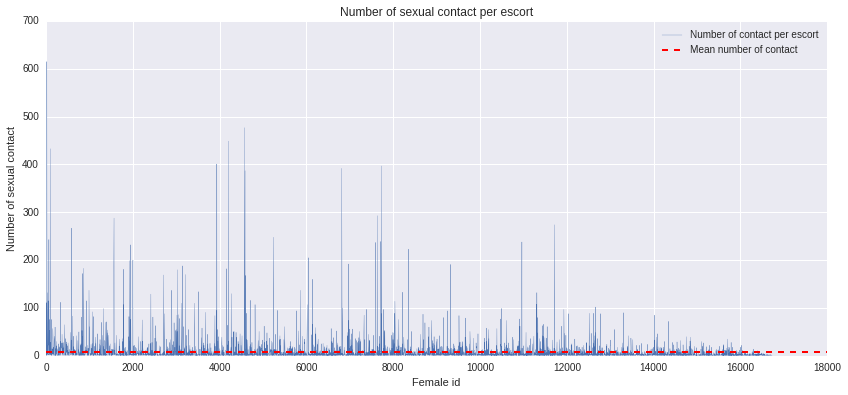

In [85]:
plt.figure(figsize=(14,6))
plt.title("Number of sexual contact per escort")
plt.plot(groupby_female.index, groupby_female["male_id"], label="Number of contact per escort", linewidth=.3)
plt.xlabel("Female id")
plt.ylabel("Number of sexual contact")

plt.axhline(y=mean_contact_women, xmin=0, xmax=18000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contact")
plt.legend()
plt.show()

### Male repartition

In [44]:
groupby_male = df.groupby("male_id").count()
groupby_male.sample(10)

,female_id,date,female_grade,anal,oral,kiss
male_id,,,,,,
7294,2,2,2,2,2,2
16200,1,1,1,1,1,1
16651,2,2,2,2,2,2
13578,1,1,1,1,1,1
14906,1,1,1,1,1,1
16392,1,1,1,1,1,1
128,4,4,4,4,4,4
10790,27,27,27,27,27,27
8550,2,2,2,2,2,2


In [45]:
mean_contact_men = np.mean(groupby_male["female_id"])
print("Mean number of contact per client :",mean_contact_men)

Mean number of contact per client : 5.01009301405


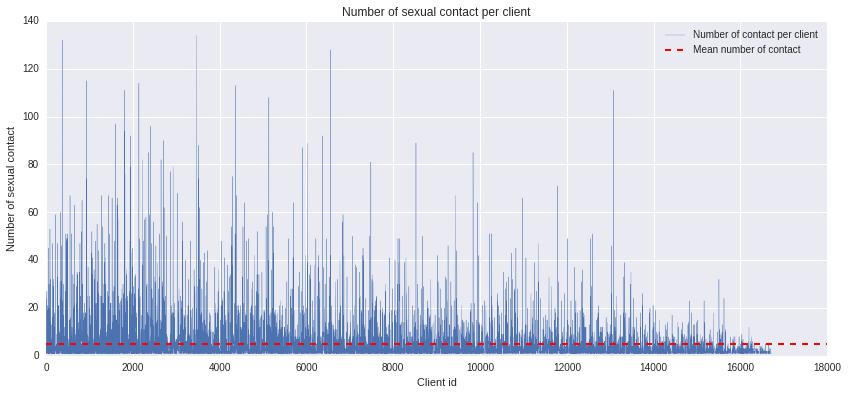

In [84]:
plt.figure(figsize=(14,6))
plt.title("Number of sexual contact per client")
plt.plot(groupby_male.index, groupby_male["female_id"], label="Number of contact per client", linewidth=.3)
plt.xlabel("Client id")
plt.ylabel("Number of sexual contact")

plt.axhline(y=mean_contact_men, xmin=0, xmax=18000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contact")
plt.legend()
plt.show()

### Temporal distribution

In [72]:
groupby_date = df.groupby("date").count()
groupby_date.sample(10)

,female_id,male_id,female_grade,anal,oral,kiss
date,,,,,,
1143,18,18,18,18,18,18
1546,47,47,47,47,47,47
2076,42,42,42,42,42,42
1938,49,49,49,49,49,49
819,23,23,23,23,23,23
408,1,1,1,1,1,1
1694,41,41,41,41,41,41
1996,30,30,30,30,30,30
1357,37,37,37,37,37,37


In [73]:
mean_contact_date = np.mean(groupby_date["female_id"])
print("Mean number of contact per date :",mean_contact_date)

Mean number of contact per date : 26.4396866841


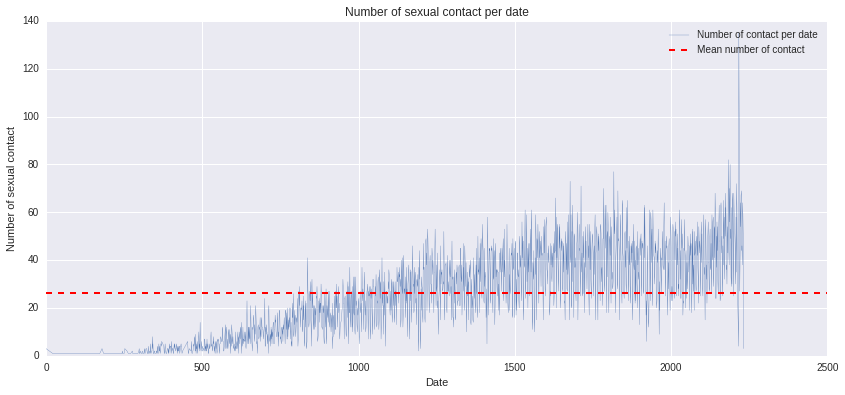

In [81]:
plt.figure(figsize=(14,6))
plt.title("Number of sexual contact per date")
plt.plot(groupby_date.index, groupby_date["female_id"], label="Number of contact per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Number of sexual contact")

plt.axhline(y=mean_contact_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contact")
plt.legend()
plt.show()

### We can observe that the number of contact per day is clearly growing with time, it may be due to the growing popularity of the forum where the data was collected

### Therefore we whould do our analysis only after approx 1000 days to have the network stabilized.

### Lets look at the data in a 500 days window

### Here is the contact from day 500 till day 1000

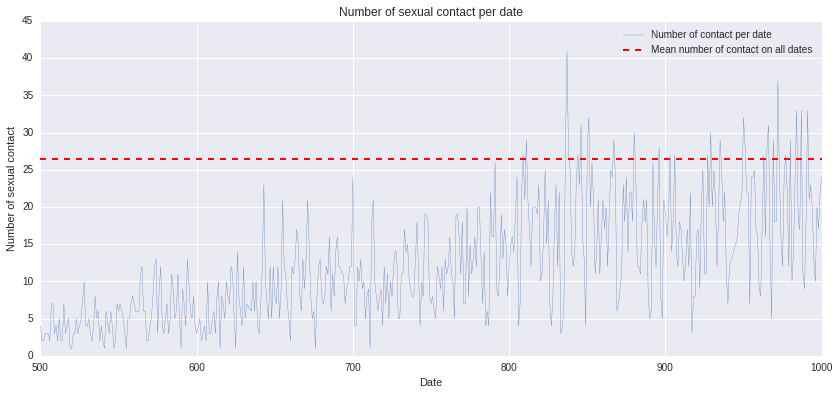

In [103]:
window_groupby_date = groupby_date.loc[500:1000]
plt.figure(figsize=(14,6))
plt.title("Number of sexual contact per date")
plt.plot(window_groupby_date.index, window_groupby_date["female_id"], label="Number of contact per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Number of sexual contact")

plt.axhline(y=mean_contact_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contact on all dates")
plt.legend()
plt.show()


### Here is the contact from day 1000 till day 1500

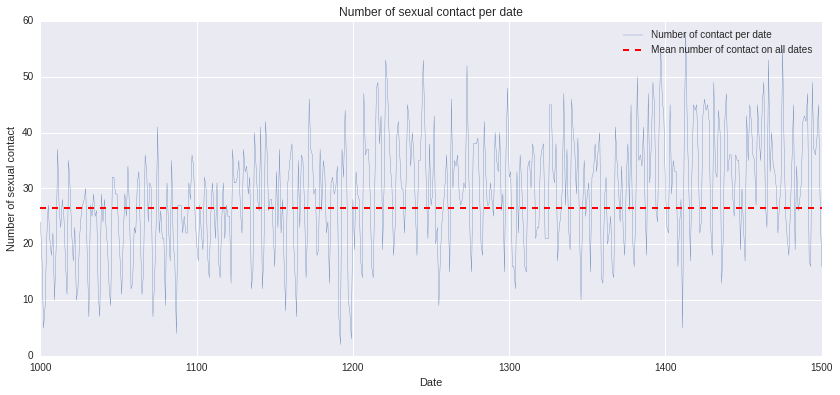

In [100]:
window_groupby_date = groupby_date.loc[1000:1500]
plt.figure(figsize=(14,6))
plt.title("Number of sexual contact per date")
plt.plot(window_groupby_date.index, window_groupby_date["female_id"], label="Number of contact per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Number of sexual contact")

plt.axhline(y=mean_contact_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contact on all dates")
plt.legend()
plt.show()

### Here is the contact from day 1500 till day 2000

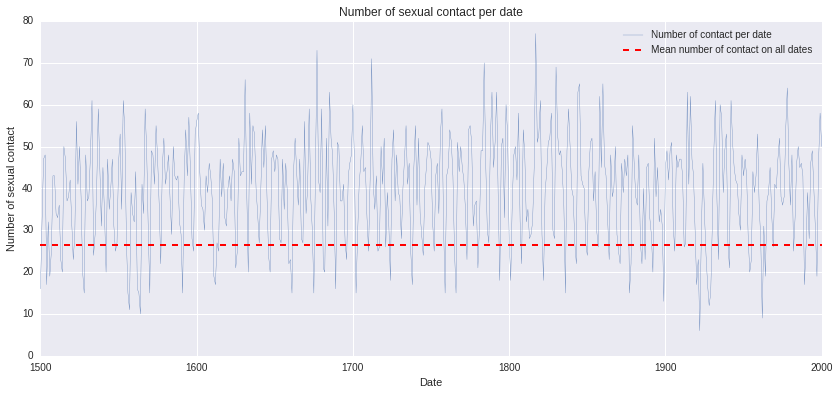

In [101]:
window_groupby_date = groupby_date.loc[1500:2000]
plt.figure(figsize=(14,6))
plt.title("Number of sexual contact per date")
plt.plot(window_groupby_date.index, window_groupby_date["female_id"], label="Number of contact per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Number of sexual contact")

plt.axhline(y=mean_contact_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contact on all dates")
plt.legend()
plt.show()

### Here is the contact from day 2000 till end

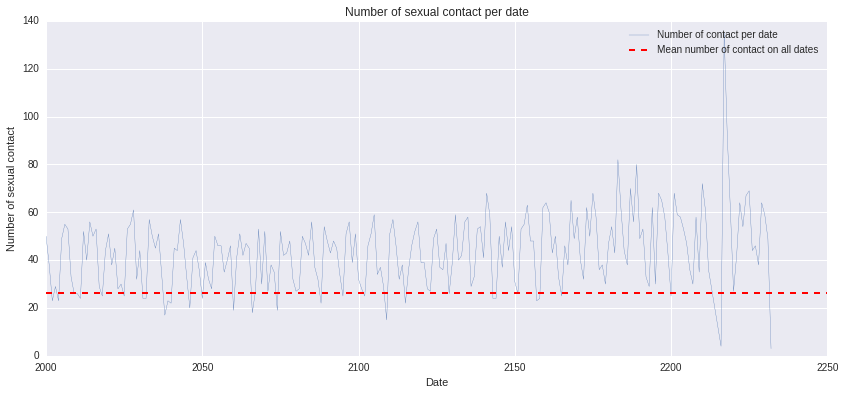

In [102]:
window_groupby_date = groupby_date.loc[2000:2500]
plt.figure(figsize=(14,6))
plt.title("Number of sexual contact per date")
plt.plot(window_groupby_date.index, window_groupby_date["female_id"], label="Number of contact per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Number of sexual contact")

plt.axhline(y=mean_contact_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contact on all dates")
plt.legend()
plt.show()

### Will there be multiple edges in the graph ?

In [113]:
multigroupby = df.groupby(["female_id","male_id"]).count()["date"]

### Percentage of number of sex contact between clients and escort

In [124]:
((multigroupby.value_counts()/df.shape[0])*100).sort_values(ascending=False)

1     66.288118
2      6.612419
3      2.010586
4      0.827540
5      0.485859
6      0.242929
7      0.159978
8      0.106652
9      0.080976
10     0.073076
11     0.039501
12     0.029626
13     0.027650
19     0.021725
18     0.019750
14     0.013825
15     0.011850
17     0.007900
24     0.005925
27     0.005925
21     0.005925
30     0.003950
20     0.003950
16     0.003950
23     0.003950
41     0.001975
39     0.001975
22     0.001975
25     0.001975
36     0.001975
26     0.001975
34     0.001975
29     0.001975
33     0.001975
31     0.001975
Name: date, dtype: float64

- Majority of contacts are one time (66%)
- 6.6% two times
- 2% three times
- more is less than 1%
